In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
task_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/yrok5statistic/5_task_1.csv')
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [3]:
task_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/yrok5statistic/5_task_2.csv')
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [19]:
control = task_2[task_2['group'] == 'control']['events']
test = task_2[task_2['group'] == 'test']['events']

In [20]:
ss.levene(control, test)

LeveneResult(statistic=2.5440050816535327, pvalue=0.11071679229795423)

In [26]:
norm_results = pg.normality(data=task_1, dv='events', group='group', method='normaltest')
norm_results

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


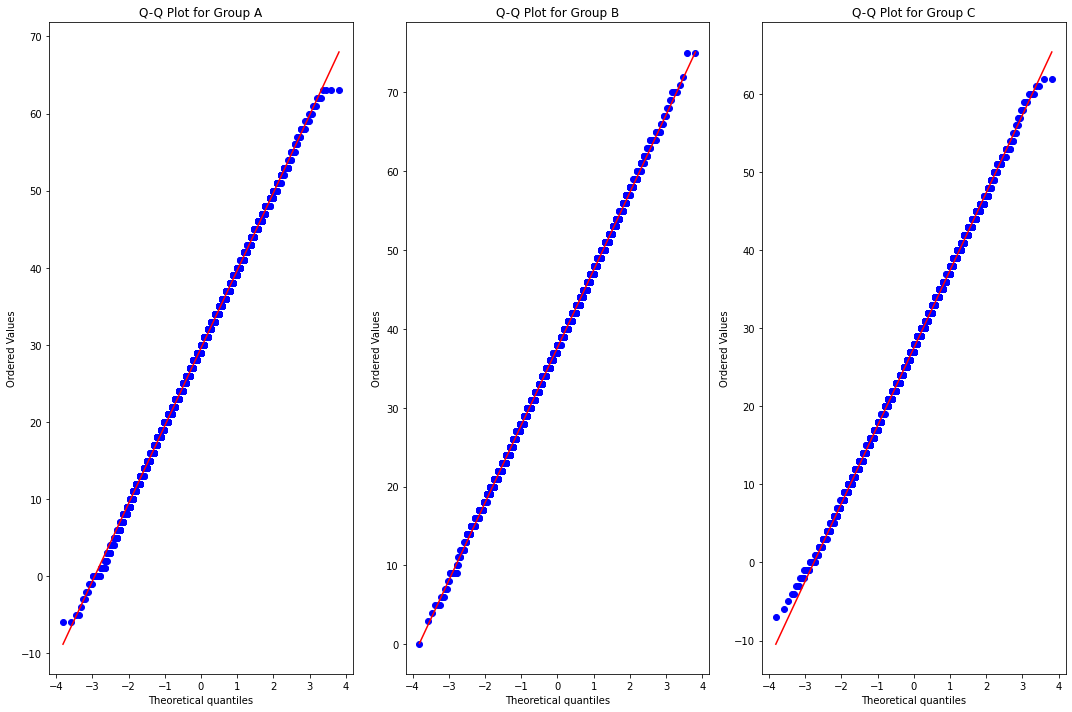

In [27]:
plt.figure(figsize=(15, 10))
groups = task_1['group'].unique()
for i, group in enumerate(groups, start=1):
    plt.subplot(1, 3, i)
    group_data = task_1[task_1['group'] == group]['events']
    ss.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Group {group}')
plt.tight_layout()
plt.show()

In [30]:
# Выделение данных по группам
a = task_1[task_1['group'] == 'A']['events']
b = task_1[task_1['group'] == 'B']['events']
c = task_1[task_1['group'] == 'C']['events'] 

In [35]:
f_stat, p_value = ss.f_oneway(a, b, c)
print(f"Результаты ANOVA: F={f_stat:.3f}, p-value={p_value:.4f}")

Результаты ANOVA: F=2886.167, p-value=0.0000


In [37]:
# Проводим тест Тьюки
tukey_results = pairwise_tukeyhsd(
    endog=task_1['events'],  # зависимая переменная
    groups=task_1['group'],  # группы для сравнения
    alpha=0.05  # уровень значимости
)
from IPython.display import display
display(tukey_results)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [38]:
c.mean()

27.4703

In [39]:
b.mean()

37.6136

In [40]:
a.mean()

29.5796

In [42]:
test = task_2.query('group == "test"')
test

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


In [43]:
control = task_2.query('group == "control"')
control

,id,group,segment,events
10000,34028,control,high,47.0
10001,75598,control,high,66.0
10002,1117,control,high,60.0
10003,7289,control,high,74.0
10004,79220,control,high,56.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


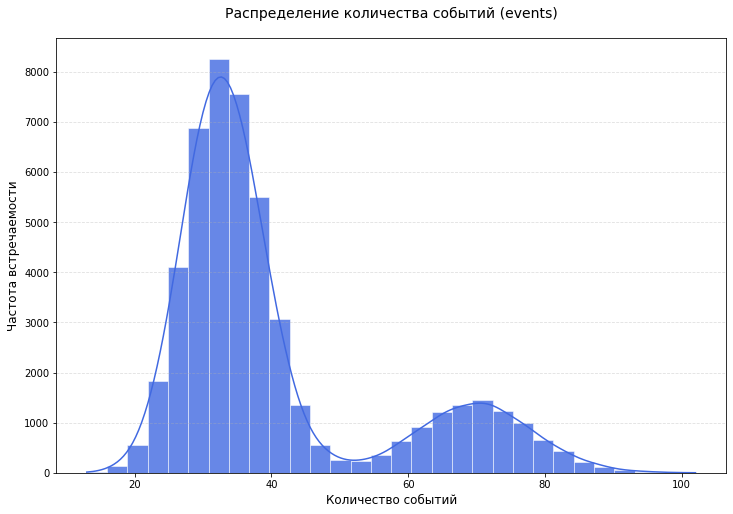

In [48]:
plt.figure(figsize=(12, 8))
sns.histplot(data=test, x="events", 
             bins=30,              # Количество столбцов
             kde=True,            # Добавить кривую плотности
             color='royalblue',   # Цвет гистограммы
             edgecolor='white',   # Цвет границ столбцов
             linewidth=0.5,       # Ширина границ
             alpha=0.8)           # Прозрачность
# Настройки оформления
plt.title('Распределение количества событий (events)', pad=20, fontsize=14)
plt.xlabel('Количество событий', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

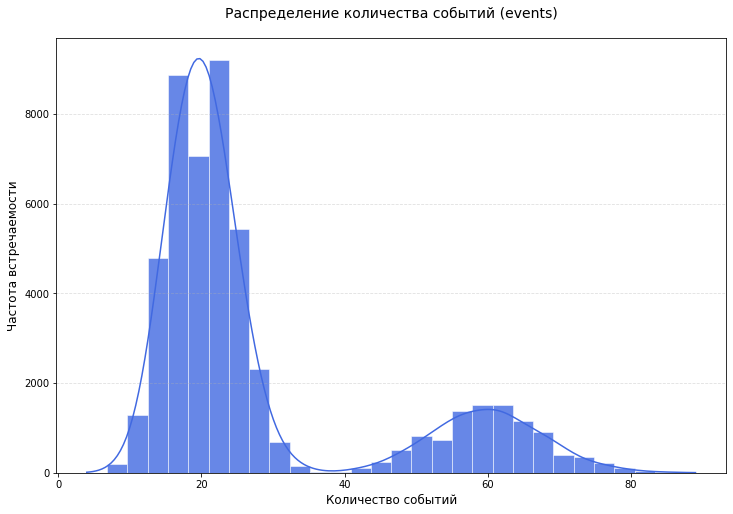

In [49]:
plt.figure(figsize=(12, 8))
sns.histplot(data=control, x="events", 
             bins=30,              # Количество столбцов
             kde=True,            # Добавить кривую плотности
             color='royalblue',   # Цвет гистограммы
             edgecolor='white',   # Цвет границ столбцов
             linewidth=0.5,       # Ширина границ
             alpha=0.8)           # Прозрачность
# Настройки оформления
plt.title('Распределение количества событий (events)', pad=20, fontsize=14)
plt.xlabel('Количество событий', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

In [53]:
test

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


In [54]:
control

,id,group,segment,events
10000,34028,control,high,47.0
10001,75598,control,high,66.0
10002,1117,control,high,60.0
10003,7289,control,high,74.0
10004,79220,control,high,56.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [57]:
high_control = task_2.query("group == 'control' & segment == 'high'")

In [58]:
high_control['events'].std().round(2)

7.81

In [59]:
low_control = task_2.query("group == 'control' & segment == 'low'")
high_test = task_2.query("group == 'test' & segment == 'high'")
low_test = task_2.query("group == 'test' & segment == 'low'")


In [60]:
task_2['combination'] = task_2.group + '/' + task_2.segment

In [61]:
pg.pairwise_tukey(data = task_2, dv = 'events', between = 'combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control/high,test/high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control/high,test/low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control/low,test/high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control/low,test/low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test/high,test/low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


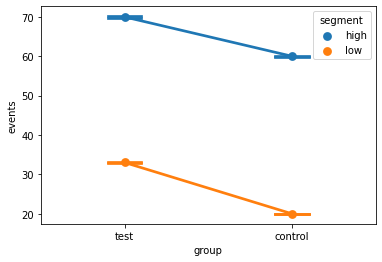

In [62]:
sns.pointplot(x="group", y="events", hue="segment", data=task_2, capsize=0.2)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


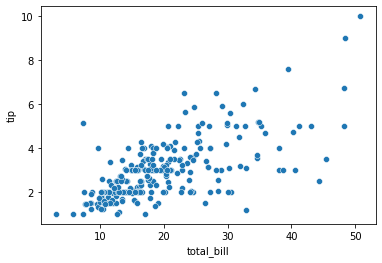

In [3]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

In [4]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [5]:
scipy.stats.pearsonr(tips.total_bill, tips.tip)

(0.6757341092113646, 6.692470646863191e-34)

In [6]:
scipy.stats.spearmanr(tips.total_bill, tips.tip)

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

In [7]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [8]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
boston['CRIM_log'] = np.log(boston.CRIM)

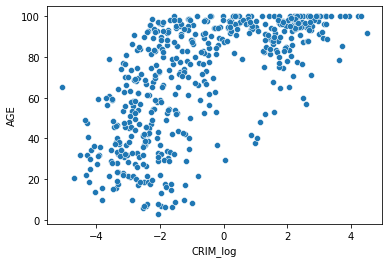

In [10]:
sns.scatterplot(data=boston, x="CRIM_log", y="AGE")

In [11]:
scipy.stats.spearmanr(boston.CRIM_log, boston.AGE)

SpearmanrResult(correlation=0.7041399841460586, pvalue=5.689192531057184e-77)

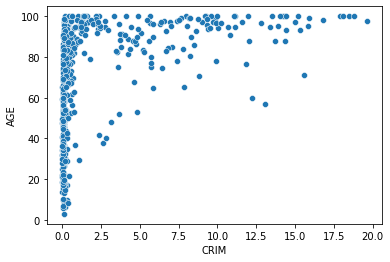

In [12]:
sns.scatterplot(data=boston[boston.CRIM < 20], x="CRIM", y="AGE")

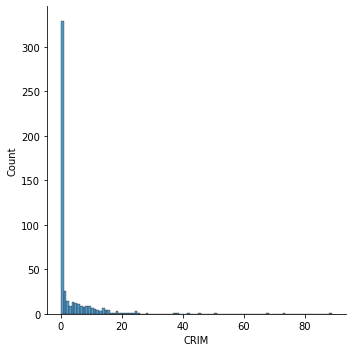

In [13]:
sns.displot(boston.CRIM, kde=False)

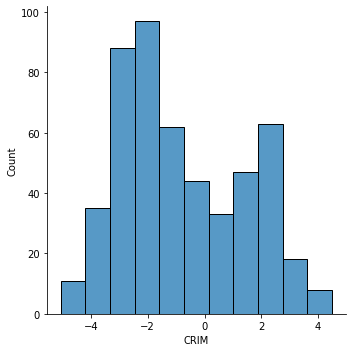

In [14]:
sns.displot(np.log(boston.CRIM), kde=False)

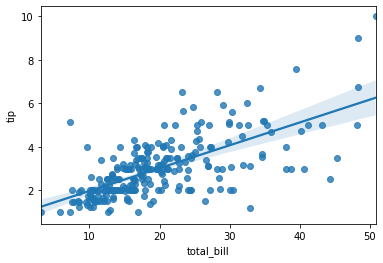

In [16]:
sns.regplot(data=tips, x="total_bill", y="tip")

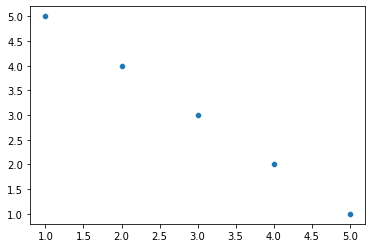

In [17]:
import seaborn as sns
sns.scatterplot(x=[4, 5, 2, 3, 1], y=[2, 1, 4, 3, 5])

In [19]:
import scipy.stats as st
st.pearsonr(x=[4, 5, 2, 3, 1], y=[2, 1, 4, 3, 5])

(-1.0, 0.0)

In [1]:
from scipy.stats import bootstrap
import pandas as pd 
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/7YROKPROGECT/bootstrap_data.csv')
df

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental
...,...,...
1249,155.091593,control
1250,147.363316,control
1251,129.780424,control
1252,158.120499,control


In [3]:
df.groupby('group').agg({'value': 'count'})

,value
group,
control,760
experimental,494


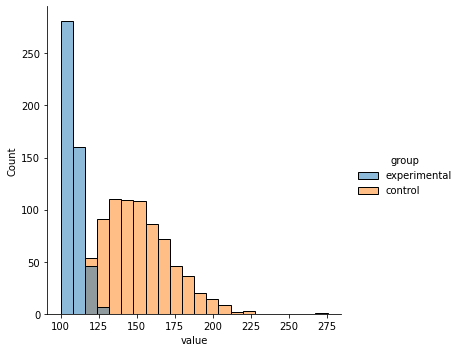

In [4]:
sns.displot(data=df, x='value', hue='group')

In [5]:
df.groupby('group').agg({'value': np.median})

,value
group,
control,148.832127
experimental,106.982597


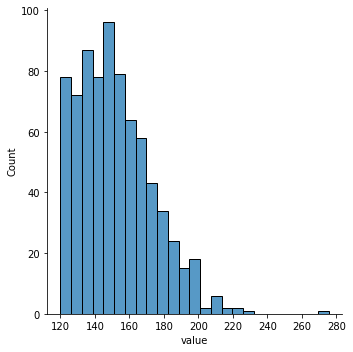

In [12]:
sns.displot(data=df[df.group == 'control'], x='value')

In [7]:
control_df = df[df.group == 'control']

In [8]:
control_df.value.median()

148.83212650911054

In [15]:
sample_df = control_df.sample(frac=1, replace=True)

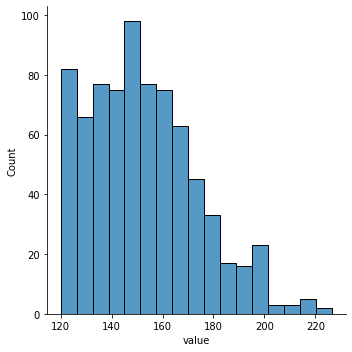

In [18]:
sns.displot(data=sample_df, x='value')

In [26]:
medians = []

In [27]:
n = 10000

In [28]:
for i in range(10000):
    sample_data = control_df.sample(frac=1, replace=True)#прогоним 10 000 раз эту выборку с повторениями
    sample_median = sample_data.value.median()#посчитаем медиану
    medians.append(sample_median)#и добавим медиану в наш лист который мы создали

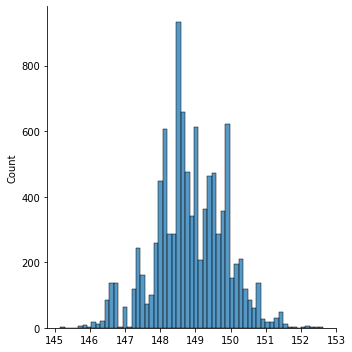

In [29]:
sns.displot(medians)

In [30]:
medians

[148.04144958256046,
 147.3375550342118,
 150.26500311195073,
 149.61441442339904,
 150.74580151060346,
 148.50287355056048,
 148.82774149731117,
 148.50287355056048,
 149.73022005669074,
 152.63602596263445,
 149.42935835643598,
 146.43089767166344,
 149.94358988308923,
 148.04144958256046,
 149.75950378048185,
 150.47478513879446,
 148.82575897694997,
 148.64837246075874,
 149.27412444251485,
 149.42935835643598,
 147.36331605147197,
 147.36331605147197,
 149.43265413917985,
 148.34527566747275,
 149.906445616996,
 147.9028991624189,
 147.45942229036717,
 147.3411611380775,
 150.26500311195073,
 149.02749617099892,
 148.57811309188975,
 148.50287355056048,
 148.83849404127113,
 149.85178548134394,
 148.44124837951412,
 149.71027253242235,
 150.2370798861362,
 148.50287355056048,
 150.36883566048482,
 146.7484955596712,
 149.92095997706303,
 149.92095997706303,
 149.42394585264532,
 147.7333888465211,
 147.7333888465211,
 148.98329774968744,
 147.9916843994328,
 148.74897211094242,
 1

In [31]:
bootstrap((control_df.value, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.68018484270613, high=150.77850952365884), standard_error=0.9878243592116487)

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
tab_data = [[21, 16], [75, 60], [5, 10]]

In [3]:
chi2_contingency(tab_data)

(2.8239706434502656,
 0.24365906101675808,
 2,
 array([[19.98395722, 17.01604278],
        [72.9144385 , 62.0855615 ],
        [ 8.10160428,  6.89839572]]))